In [1]:
# ref: https://github.com/ncarkaci/binary-to-image
import numpy as np
import os, math
import argparse
from PIL import Image


In [2]:
def defineColorMap():
  rows  = 256
  columns = 256
  min = 0 
  max = 255
  step = 2
  colormap = np.random.randint(min, max, size=rows * columns, dtype='l')
  colormap.resize(rows,columns)
  print(colormap)
  print("\n\n ",colormap.shape)
  return colormap

In [3]:
colormap = defineColorMap()

[[229 207  79 ... 156   8  29]
 [251 138 240 ... 208  78 102]
 [174 164  81 ... 155  32  74]
 ...
 [ 16  15 210 ... 112 120 202]
 [ 38 164 156 ... 238 133 218]
 [ 89 138 100 ...   1 246 112]]


  (256, 256)


In [4]:
R_colormap = defineColorMap()
G_colormap = defineColorMap()
B_colormap = defineColorMap()


[[116  30  42 ... 175  95  61]
 [ 55 125 222 ...  41 177  75]
 [ 19 110 122 ...  52 234  92]
 ...
 [233 234 118 ...  59 252 248]
 [198 160  94 ...  25  20 132]
 [117   8 192 ...  12  73  66]]


  (256, 256)
[[ 23  33 218 ... 179 178 211]
 [180 127 175 ...  65 222 207]
 [168  62 105 ... 206 176 214]
 ...
 [151  91 246 ...  66  66   8]
 [ 85 232  34 ... 147  20  38]
 [ 67 192 209 ...  94 137  58]]


  (256, 256)
[[112 115 127 ...  36 196 202]
 [ 69  43  36 ... 222 246  15]
 [124 172 226 ... 199 146 142]
 ...
 [  5  20  76 ... 141  31 219]
 [ 90  11  16 ...  31 198 170]
 [114 180  26 ...  45  14  57]]


  (256, 256)


In [5]:
def readBytes (filename):
  img_bin_data = []
  with open(filename, 'rb') as file:
     #this sintax is to be read as "with the output of the function open considered as a file"
     # wb as in read binary
    while True:
      # as long as we can read one byte
      b = file.read(1)
      if not b:
        break
      img_bin_data.append(int.from_bytes(b, byteorder='big'))
  return img_bin_data

In [6]:
img_bin_data = readBytes('/content/logounirc.png')
print(img_bin_data)

[137, 80, 78, 71, 13, 10, 26, 10, 0, 0, 0, 13, 73, 72, 68, 82, 0, 0, 6, 83, 0, 0, 5, 195, 8, 2, 0, 0, 0, 203, 59, 95, 240, 0, 0, 0, 9, 112, 72, 89, 115, 0, 0, 46, 35, 0, 0, 46, 35, 1, 120, 165, 63, 118, 0, 0, 0, 25, 116, 69, 88, 116, 83, 111, 102, 116, 119, 97, 114, 101, 0, 65, 100, 111, 98, 101, 32, 73, 109, 97, 103, 101, 82, 101, 97, 100, 121, 113, 201, 101, 60, 0, 2, 207, 161, 73, 68, 65, 84, 120, 218, 236, 221, 13, 92, 84, 117, 222, 240, 127, 106, 99, 105, 73, 152, 88, 47, 64, 210, 49, 195, 41, 237, 15, 18, 74, 222, 164, 88, 43, 186, 180, 92, 104, 184, 187, 153, 15, 120, 111, 165, 123, 165, 88, 215, 218, 131, 221, 43, 61, 184, 107, 235, 86, 216, 174, 214, 186, 91, 2, 237, 106, 181, 127, 64, 205, 174, 86, 74, 254, 36, 43, 88, 129, 15, 55, 43, 146, 192, 29, 230, 104, 234, 136, 34, 94, 166, 51, 154, 53, 113, 183, 254, 127, 122, 90, 150, 229, 225, 252, 206, 60, 207, 57, 124, 222, 47, 94, 190, 16, 14, 51, 103, 126, 115, 102, 206, 239, 124, 231, 251, 253, 254, 174, 184, 120, 241, 98, 8, 

In [7]:
def to1DArray_greyscale(img_bin_data):
  pixel_array = []
  for index in range(0, len(img_bin_data)-2) :
    pixel_array.append(colormap[img_bin_data[index]][img_bin_data[index+1]])
  return pixel_array  

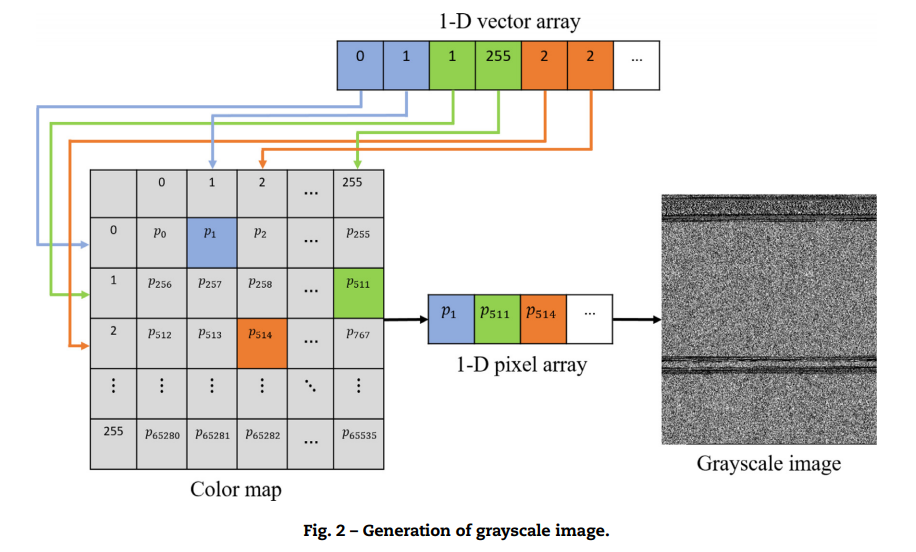

In [8]:
greyscale_array = to1DArray_greyscale(img_bin_data)

In [9]:
def to1DArray_RGB(img_bin_data):
  pixel_array = []
  for index in range(0, len(img_bin_data)-2) :
    pixel_array.append((R_colormap[img_bin_data[index]][img_bin_data[index+1]], G_colormap[img_bin_data[index]][img_bin_data[index+1]], B_colormap[img_bin_data[index]][img_bin_data[index+1]]))
    print(pixel_array[index])
  return pixel_array  

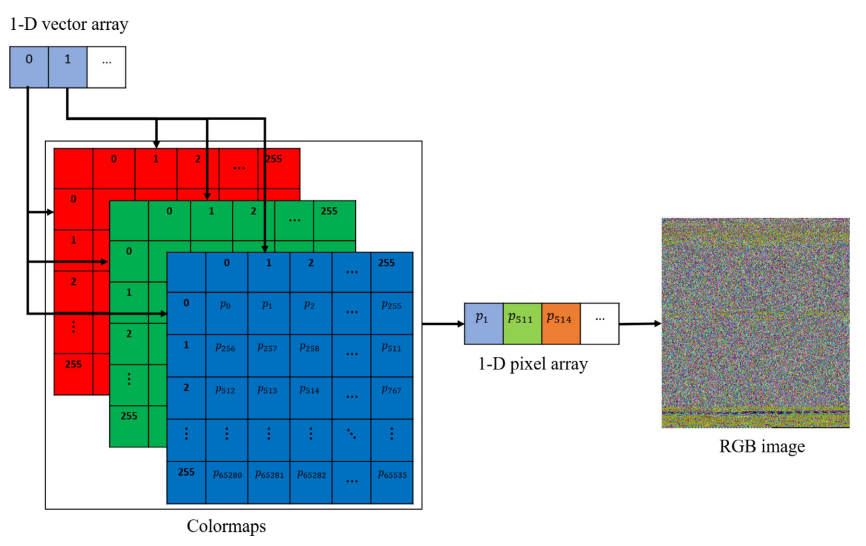

In [10]:
RGB_array = to1DArray_RGB(img_bin_data)

Streaming output truncated to the last 5000 lines.
(177, 18, 182)
(140, 82, 32)
(80, 108, 228)
(5, 190, 4)
(89, 135, 21)
(7, 121, 250)
(246, 3, 147)
(148, 105, 100)
(10, 215, 183)
(132, 9, 195)
(15, 44, 169)
(35, 191, 28)
(252, 212, 174)
(103, 163, 99)
(50, 51, 175)
(200, 249, 109)
(151, 144, 85)
(119, 134, 203)
(20, 46, 54)
(5, 154, 186)
(198, 174, 72)
(38, 7, 215)
(84, 191, 216)
(46, 79, 99)
(218, 180, 83)
(205, 141, 166)
(224, 163, 67)
(66, 95, 34)
(230, 17, 127)
(201, 159, 45)
(155, 27, 52)
(216, 151, 18)
(171, 203, 80)
(241, 181, 118)
(212, 253, 76)
(92, 123, 45)
(196, 162, 128)
(218, 168, 16)
(202, 35, 139)
(32, 193, 17)
(30, 218, 167)
(126, 208, 138)
(134, 176, 234)
(241, 149, 122)
(238, 236, 130)
(229, 227, 243)
(148, 148, 65)
(201, 252, 236)
(230, 82, 24)
(142, 135, 223)
(142, 82, 85)
(44, 185, 57)
(219, 176, 234)
(71, 42, 181)
(31, 84, 55)
(254, 162, 149)
(78, 124, 127)
(247, 209, 95)
(28, 85, 161)
(27, 124, 156)
(135, 141, 75)
(199, 116, 2)
(116, 22, 162)
(51, 240, 213)
(159

In [11]:
def saveImg (filename, data, size, img_type):
  try:
    image = Image.new(img_type, size)
    image.putdata(data)
    ''' ref: https://github.com/ncarkaci/binary-to-image
    setup output filename
    dirname     = os.path.dirname(filename)
    name, _     = os.path.splitext(filename)
    name        = os.path.basename(name)
    imagename   = dirname + os.sep + img_type + os.sep + name + '_'+img_type+ '.png'
    os.makedirs(os.path.dirname(imagename), exist_ok=True)'''
    image.save(filename)
    print('The file', filename, 'saved.')
  except Exception as err:
    print(err)

In [12]:
saveImg('/content/output.png', greyscale_array, (512,512),'L')

The file /content/output.png saved.


In [13]:
saveImg('/content/outputt.png', RGB_array, (512,512),'RGB')


The file /content/outputt.png saved.


In [14]:
def findMax(matrix):
  max = 0
  for i in range(0,256):
    for j in range(0,256):
      if matrix[i][j]>max:
        max =  matrix[i][j]
  return int(max)

In [15]:
def generateMarkovImg(binary_data):
  # input B (binary_data) = {b1, b2, b3...bn} is a set where bi represents the decimal value of a byte.
  # TM[i][j] represents the probability that byte bi is followed by bj
  TM = np.zeros((256,256))
  S = np.zeros((256,1))
  L = len(binary_data)
  #we determine the frequency of occurrence of byte bi followed by bi+1 and bi followed by bk where 0 ≤ k ≤ 255. 
  i=0
  while i < L-1:
    r = binary_data[i]
    
    c = binary_data[i+1]
    
    TM[r][c] = TM[r][c] +1
    S[r] = S[r] + 1
    
    i = i+1

  i = 0
  j = 0
  #compute the probability that byte bi is followed by bi+1
  while i < 256:
    rs = S[i]
    while j < 256:
      TM[i][j] = TM[i][j]/rs
      j = j+1
    i = i+1

  print("TM shape", TM.shape)
  MP = findMax(TM)
  print('max',MP)
  i = 0
  j = 0
  M =  np.zeros((256,256))
  # compute pixels in Markov image
  while i < 256:
    while j < 256:
      
      p = (TM[i][j]*(255/MP))%256
      M[i][j] = p
      j = j+1
    i = i+1
  print(M)
  return M
  #Output: M = {m1, m2, m3...mn} is a set where mi represents a pixel value in Markov image.


In [16]:
matrix = np.zeros((256,256))
matrix[1][2] = 500

matrix[150][120] = 12
findMax(matrix)


500

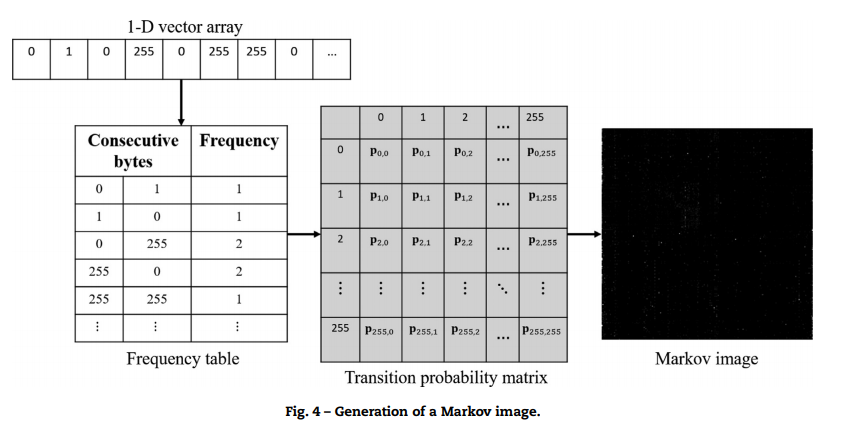

In [17]:
saveImg('/content/outputtt.png', generateMarkovImg(img_bin_data), (512,512),'L')

TM shape (256, 256)
max 180
[[0.56659641 0.00245888 0.00175634 ... 0.00351269 0.00210761 0.00351269]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
The file /content/outputtt.png saved.


Mapping : 
          if(i%2 == 0) :
            row_index = i - i/2
          else
            col_index = i - i//2